# 09 - Final Evaluation and Deployment Prepartion

## 9.1 Set-up

### 9.1.1 Logger

In [1]:
from logging_config import LOG_PATH, NotebookLogger, setup_notebook_logging

# logger, log_start, log_check, log_result = setup_notebook_logging(label="ENGINEERING")
logger = NotebookLogger(label="EVAL", notebook_name=None, file_log_path=LOG_PATH)

logger.log_start(print_to_console=True)
logger.log_result("Logging configured.", print_to_console=True)

================== Starting notebook: 09-final-eval-and-deploy-prep_LOCAL_1503 (Session 186) ==================
[EVAL RESULT] Logging configured.


### 9.1.2 Project Root

In [2]:
# logger.info("Setting up root by appending the parent to the sys...")
from jupyter_init import setup

setup()

### 9.1.3 Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

# --- local modules ---


from notebooks.juputils import display_func
from src_code.config import ENGINEERING_MAPPINGS
from src_code.ml_pipeline.df_utils import load_df
from src_code.config import MODEL_DIR, RANDOM_FOREST_MODEL
from src_code.ml_pipeline.df_utils import load_model
from notebooks.constants import TARGET
from src_code.ml_pipeline.feature_config import DROP_COLS
from src_code.ml_pipeline.training.utils import drop_cols
from src_code.ml_pipeline.testing.testing import infer
from src_code.ml_pipeline.testing.testing import evaluate
from src_code.ml_pipeline.testing.testing import prec_recall_curve
from src_code.ml_pipeline.testing.testing import find_best_threshold
from src_code.ml_pipeline.testing.testing import find_optimal_threshold_MCC
from src_code.ml_pipeline.testing.testing import display_ROC_curve

### 9.1.4 Loading Dataset

In [4]:
display_func(load_df)

def load_df(df_file_path: Path, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER):
    logger.log_check("Loading the dataset...", print_to_console=True)

    df = pd.read_feather(df_file_path)
    logger.log_result(f"Loaded dataframe with {len(df)} rows and {len(df.columns)} columns\n", print_to_console=True)

    return df

In [5]:
# log_check("Loading the dataset...")

# # TRANSFORMED_DF = EXTRACTED_DATA_DIR / "train_labeled_features_partial.feather"
# from src_code.config import ENGINEERING_MAPPINGS
# from src_code.ml_pipeline.df_utils import load_df


DF_PATH = ENGINEERING_MAPPINGS['test']['output']
# DF_PATH = 'lala.feather'

# # ---- LOAD ----
# df = pd.read_feather(DF_PATH)
# df.describe()


df = load_df(df_file_path=DF_PATH, logger=logger)

df.describe()

[EVAL CHECK] Loading the dataset...
[EVAL RESULT] Loaded dataframe with 7363 rows and 103 columns



,author_exp_pre,author_recent_activity_pre,loc_added,loc_deleted,files_changed,hunks_count,msg_len,ast_delta,complexity_delta,max_func_change,...,activity_per_exp,line_token_total,todo_ratio,fixme_ratio,try_ratio,except_ratio,raise_ratio,loc_added_x_loc_deleted,loc_added_x_hunks_count,loc_deleted_x_hunks_count
count,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,...,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000
mean,2.840142,2.444520,3.266355,3.898516,2.094760,3.417300,4.857223,2.704583,0.802345,3.994454,...,0.579145,1.231796,0.015466,0.000322,0.131721,0.049608,0.041409,14.538188,12.927895,14.801155
std,1.453951,1.339029,1.710148,1.510910,0.920425,1.213459,0.764812,2.298529,0.900588,1.485577,...,0.226870,1.805038,0.056913,0.008198,0.201134,0.131302,0.125245,10.352738,9.184485,8.877840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.833213,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.791759,1.609438,1.945910,2.890372,1.386294,2.564949,4.174387,0.000000,0.000000,3.583519,...,0.523331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.165612,4.569000,7.672484
50%,2.995732,2.564949,3.465736,4.077537,1.945910,3.496508,4.859812,3.091042,0.000000,4.276666,...,0.651867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.678418,11.970531,14.257489
75%,3.891820,3.367296,4.804021,5.164786,2.833213,4.418841,5.517453,5.075174,1.791759,5.023881,...,0.741009,2.079442,0.000000,0.000000,0.248283,0.000000,0.000000,22.795703,20.289937,21.604479
max,5.978886,5.081404,5.433722,5.814131,3.637586,5.204007,5.985195,5.474369,2.140066,5.592851,...,0.835564,13.135453,0.616776,0.409384,1.739033,1.098612,2.397895,31.592369,28.277126,30.256774


### 9.1.5 Loading Trained Model

In [6]:
display_func(load_model)

def load_model(path: Path, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER):
    logger.log_check("Loading a trained model...")

    model = joblib.load(path)
    # rf = model.named_steps['rf']
    # print("Pipeline Steps:", model.named_steps.keys())
    # logger.log_result(f"Hyperparameters: {model.get_params()}")
    # model_features = model.feature_names_in_
    # logger.log_result(f"The model was trained on {len(model_features)} features:")

    logger.log_result("Loading successful.")
    logger.log_result(f"Hyperparameters: {model.get_params()}")
    logger.log_result(f"The model was trained on {len(model.feature_names_in_)} features:")

    return model

In [7]:
# # import poplib
# from src_code.config import MODEL_DIR, RANDOM_FOREST_MODEL
# import joblib

# from src_code.ml_pipeline.df_utils import load_model

# MODEL_PATH = RANDOM_FOREST_MODEL
MODEL_PATH = MODEL_DIR / "RF_model_script_train.joblib"
# model = joblib.load(MODEL_PATH)
# # rf = model.named_steps['rf']
# # print("Pipeline Steps:", model.named_steps.keys())
# logger.log_result(f"Hyperparameters: {model.get_params()}")
# model_features = model.feature_names_in_
# logger.log_result(f"The model was trained on {len(model_features)} features:")
model = load_model(path=MODEL_PATH, logger=logger)
model_features = model.feature_names_in_
# print(model_features)
# print('todo' in model_features)

[EVAL CHECK] Loading a trained model...
[EVAL RESULT] Loading successful.
[EVAL RESULT] Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
[EVAL RESULT] The model was trained on 82 features:


## 9.2 Final Evaluation

### 9.2.1 Column Filtering

In [8]:
display_func(drop_cols)

def drop_cols(
    df: pd.DataFrame, cols: Iterable[str], logger: NotebookLogger = DEF_NOTEBOOK_LOGGER
):
    logger.log_check("Dropping the specified columns...")

    start_cols = set(df.columns)

    df = df.drop(columns=cols, errors="ignore")

    end_cols = set(df.columns)

    logger.log_result("Dropping completed.")
    logger.log_result(f"Columns dropped: {len(start_cols - end_cols)}")
    logger.log_result(f"Columns remaining: {len(end_cols)}")
    return df

In [9]:
# from notebooks.constants import TARGET
# from src_code.ml_pipeline.feature_config import DROP_COLS
# from src_code.ml_pipeline.training.utils import drop_cols

X_test = drop_cols(df=df, cols=DROP_COLS + [TARGET], logger=logger)

# for feature in X_test:
#     if feature not in model_features:
#         X_test = X_test.drop(feature)
X_test = X_test[model_features]

[EVAL CHECK] Dropping the specified columns...
[EVAL RESULT] Dropping completed.
[EVAL RESULT] Columns dropped: 11
[EVAL RESULT] Columns remaining: 92


### 9.2.2 Inference

In [10]:
display_func(infer)

def infer(model: BaseEstimator, X_test, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER):
    logger.log_check("Performing final model inference...")
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    logger.log_result("Inference complete.")
    return predictions, probabilities

In [ ]:
# 5. Prepare Features for Prediction
# Ensure you drop non-feature columns (labels, commits, hashes) before predicting
# Replace 'label' with your actual target column name
# X_test = df.drop(
#     columns=[
#         "label",
#         "commit",
#         "datetime",
#         "repo",
#         "author_email",
#         "canonical_datetime",
#         "content",
#         "filepath",
#         "files_changed",
#         'lines',
#         'loc_added_bucket',
#         "methods"
#     ],
#     errors="ignore",
# )
# y_true = df["label"] if "label" in df.columns else None
# print(y_true)

# from notebooks.constants import TARGET
# from src_code.ml_pipeline.feature_config import DROP_COLS
# from src_code.ml_pipeline.training.utils import drop_cols

# X_test = drop_cols(df=df, cols=DROP_COLS + [TARGET], logger=logger)

# # for feature in X_test:
# #     if feature not in model_features:
# #         X_test = X_test.drop(feature)
# X_test = X_test[model_features]

        
# # 6. Predict
# from src_code.ml_pipeline.testing.testing import infer


y_true = df["label"] if "label" in df.columns else None
# predictions = model.predict(X_test)
# probabilities = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

predictions, probabilities = infer(X_test=X_test, model=model, logger=logger)

[EVAL CHECK] Performing final model inference...
[EVAL RESULT] Inference complete.


### 9.2.2 Evaluation

In [12]:
display_func(evaluate)

def evaluate(y_true, predictions, probabilities, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER, threshold: float = None):
    logger.log_check("Evaluating model inference...")

    if threshold:
        predictions = (probabilities >= threshold).astype(int)


    logger.log_result(classification_report(y_true, predictions))
    logger.log_result(f"ROC-AUC Score: {roc_auc_score(y_true, probabilities):.4f}")

    logger.log_result("Evaluation complete.")

In [13]:
# if y_true is not None:
#     print(classification_report(y_true, predictions))
#     print(f"ROC-AUC Score: {roc_auc_score(y_true, probabilities):.4f}")
evaluate(y_true=y_true, predictions=predictions, probabilities=probabilities, logger=logger)

[EVAL CHECK] Evaluating model inference...
[EVAL RESULT]               precision    recall  f1-score   support

           0       0.95      0.37      0.54      6535
           1       0.15      0.86      0.25       828

    accuracy                           0.43      7363
   macro avg       0.55      0.61      0.39      7363
weighted avg       0.86      0.43      0.50      7363

[EVAL RESULT] ROC-AUC Score: 0.6491
[EVAL RESULT] Evaluation complete.


### 9.2.3 Precision Recall Curve

In [14]:
display_func(prec_recall_curve)

def prec_recall_curve(y_true, probs, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER):
    logger.log_check("Plotting precision recall curve...")
    
    precision, recall, thresholds = precision_recall_curve(y_true, probs)

    plt.plot(thresholds, precision[:-1], label="Precision")
    plt.plot(thresholds, recall[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.title("The Precision-Recall Tradeoff")
    plt.legend()
    plt.show()

    logger.log_result("Plotting complete.")

    return precision, recall, thresholds

[EVAL CHECK] Plotting precision recall curve...


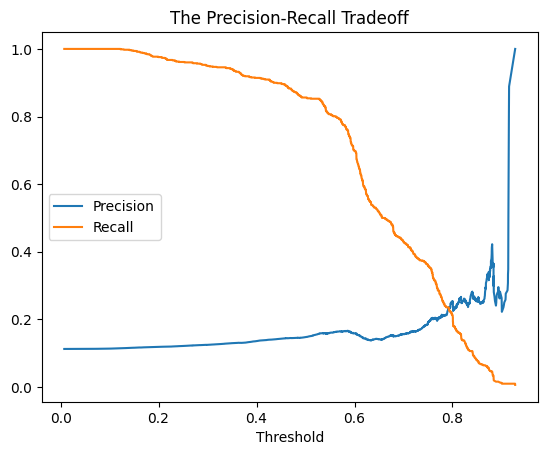

[EVAL RESULT] Plotting complete.


In [15]:

# Get probabilities instead of hard predictions
# probs = model.predict_proba(X_test)[:, 1]
# precision, recall, thresholds = precision_recall_curve(y_true, probs)

# plt.plot(thresholds, precision[:-1], label="Precision")
# plt.plot(thresholds, recall[:-1], label="Recall")
# plt.xlabel("Threshold")
# plt.title("The Precision-Recall Tradeoff")
# plt.legend()
# plt.show()

precision, recall, thresholds = prec_recall_curve(y_true=y_true, probs=probabilities, logger=logger)

### 9.2.4 Setting custom threshold

In [ ]:
# # Instead of predictions = model.predict(X_test)
# custom_threshold = 0.75  # Found from the chart above
# # custom_predictions = (probs >= custom_threshold).astype(int)

# # from sklearn.metrics import classification_report
# # print(classification_report(y_true, custom_predictions))
# evaluate(
#     y_true=y_true,
#     predictions=predictions,
#     probabilities=probabilities,
#     logger=logger,
#     threshold=custom_threshold,
# )

[EVAL CHECK] Evaluating model inference...
[EVAL RESULT]               precision    recall  f1-score   support

           0       0.91      0.81      0.85      6535
           1       0.19      0.36      0.25       828

    accuracy                           0.76      7363
   macro avg       0.55      0.58      0.55      7363
weighted avg       0.83      0.76      0.79      7363

[EVAL RESULT] ROC-AUC Score: 0.6491
[EVAL RESULT] Evaluation complete.


### 9.2.5 Best Threshold for F1

In [ ]:
# display_func(find_best_threshold)

def find_best_threshold(precision, recall, thresholds, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER):
    # Calculate F1 for every threshold produced by the PR curve
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    logger.log_result(f"Optimal Threshold for F1: {best_threshold:.4f}")
    logger.log_result(f"Best achievable F1-Score: {f1_scores[best_idx]:.4f}")

    return best_threshold

In [ ]:
# # Calculate F1 for every threshold produced by the PR curve
# # f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
# # best_idx = np.argmax(f1_scores)
# # best_threshold = thresholds[best_idx]

# # logger.log_result(f"Optimal Threshold for F1: {best_threshold:.4f}")
# # logger.log_result(f"Best achievable F1-Score: {f1_scores[best_idx]:.4f}")
# best_threshold = find_best_threshold(
#     precision=precision, recall=recall, thresholds=thresholds, logger=logger
# )

# # Apply this threshold
# # final_preds = (probs >= best_threshold).astype(int)
# # print(classification_report(y_true, final_preds))
# evaluate(
#     y_true=y_true,
#     predictions=predictions,
#     probabilities=probabilities,
#     logger=logger,
#     threshold=best_threshold,
# )

[EVAL RESULT] Optimal Threshold for F1: 0.5803
[EVAL RESULT] Best achievable F1-Score: 0.2729
[EVAL CHECK] Evaluating model inference...
[EVAL RESULT]               precision    recall  f1-score   support

           0       0.95      0.51      0.66      6535
           1       0.17      0.77      0.27       828

    accuracy                           0.54      7363
   macro avg       0.56      0.64      0.47      7363
weighted avg       0.86      0.54      0.62      7363

[EVAL RESULT] ROC-AUC Score: 0.6491
[EVAL RESULT] Evaluation complete.


In [19]:
# import pandas as pd

# # Get feature names from the preprocessor we fixed earlier
# feature_names = preprocessor.get_feature_names_out()
# importances = model.feature_importances_

# feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
# print("Top 10 Most Important Features:")
# print(feat_imp.head(10))

### 9.2.6 Optimal Threshold for MCC

In [20]:
display_func(find_optimal_threshold_MCC)

def find_optimal_threshold_MCC(y_true, probs, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER):
    thresholds = np.linspace(0, 1, 100)
    mcc_scores = [matthews_corrcoef(y_true, probs >= t) for t in thresholds]

    # 3. Find the best one
    best_threshold = thresholds[np.argmax(mcc_scores)]
    best_mcc = max(mcc_scores)

    logger.log_result(f"Optimal Threshold for MCC: {best_threshold:.4f}")
    logger.log_result(f"Best MCC Score: {best_mcc:.4f}")

    return best_threshold, best_mcc

In [21]:
# 1. Get the probabilities
# probs = model.predict_proba(X_test)[:, 1]

# 2. Test 100 different thresholds to find the best MCC
# thresholds = np.linspace(0, 1, 100)
# mcc_scores = [matthews_corrcoef(y_true, probs >= t) for t in thresholds]

# # 3. Find the best one
# best_threshold = thresholds[np.argmax(mcc_scores)]
# best_mcc = max(mcc_scores)

# print(f"Optimal Threshold for MCC: {best_threshold:.4f}")
# print(f"Best MCC Score: {best_mcc:.4f}")

best_mcc_threshold, best_mcc = find_optimal_threshold_MCC(y_true=y_true, probs=probabilities, logger=logger)

# 4. Generate the final report
# final_predictions = (probs >= best_threshold).astype(int)
# print(classification_report(y_true, final_predictions))
evaluate(
    y_true=y_true,
    predictions=predictions,
    probabilities=probabilities,
    logger=logger,
    threshold=best_mcc_threshold,
)


[EVAL RESULT] Optimal Threshold for MCC: 0.5657
[EVAL RESULT] Best MCC Score: 0.1780
[EVAL CHECK] Evaluating model inference...
[EVAL RESULT]               precision    recall  f1-score   support

           0       0.95      0.48      0.64      6535
           1       0.16      0.80      0.27       828

    accuracy                           0.52      7363
   macro avg       0.56      0.64      0.46      7363
weighted avg       0.86      0.52      0.60      7363

[EVAL RESULT] ROC-AUC Score: 0.6491
[EVAL RESULT] Evaluation complete.


### 9.2.7 ROC Curve

In [23]:
display_func(display_ROC_curve)

def display_ROC_curve(y_true, probabilities, logger: NotebookLogger = DEF_NOTEBOOK_LOGGER):
    logger.log_check("Displaying ROC curve...")
    fpr, tpr, _ = roc_curve(y_true, probabilities)

    plt.plot(fpr, tpr, label="Model")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    logger.log_result("Displayed successfully.")

[EVAL CHECK] Displaying ROC curve...


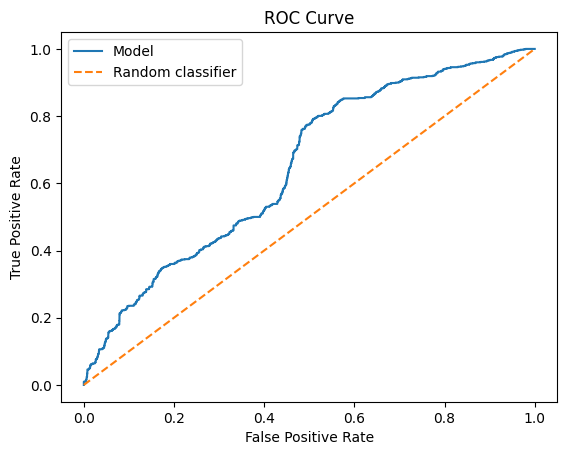

[EVAL RESULT] Displayed successfully.


In [ ]:
# fpr, tpr, _ = roc_curve(y_true, probabilities)

# plt.plot(fpr, tpr, label="Model")
# plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")

# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()
display_ROC_curve(y_true=y_true, probabilities=probabilities, logger=logger)